<a href="https://colab.research.google.com/github/slowvak/FeatureSelectionTutorial/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A bit about Colab (Jupyter) Notebooks and Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

## Code cells
Below is a **code cell**. Click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.


In [ ]:
a = 10
a

10

## Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see  [markdown
guide](/notebooks/markdown_guide.ipynb).



## Adding and moving cells
You can add new cells by using the **+ CODE** and **+ TEXT** buttons that are near the menu and also show when you hover between cells. These buttons add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar or the up/down arrows in the toolbar at the upper right of a selected cell. 

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Ctrl while clicking another.  Similarly, using Shift instead of Ctrl will select all intermediate cells.

# Working with python
Colaboratory is built on top of [Jupyter Notebook](https://jupyter.org/). Below are some examples of convenience functions provided.

A cell can be interrupted using the menu entry **Runtime -> Interrupt execution** (*hotkey: Cmd/Ctrl-M I*) to stop execution.
Try it by running the cell below, and then interrupting it.

In [ ]:
import time
print("Sleeping--try to interrupt my sleep!")
time.sleep(30) # sleep for a while; interrupt me quick!
print("Done Sleeping")

Sleeping--try to interrupt my sleep!
Done Sleeping


## Rich, interactive outputs
Typically, the generated outputs are text, but they can be more interesting, like the chart below. 

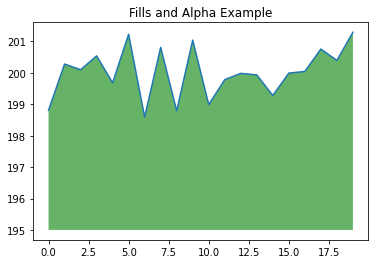

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(20)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

A unique feature of notebooks and cells that that the notebook 'remembers' what has been done up to that point. And you can run a cell, change something in that cell, and run it again (presumably to fix a problem in that cell). 

Modify the cell above to change it so 200 random numbers are plotted (change the '20' in the randn call to '200'). Then run the cell again and note the change. Note also that the number in brackets has increased--this shows to some degree--the sequence that cells were executed.

#Feature Selection
  Now we are ready to begin working on the specific topic at hand: feature selection.
It uses the Pima Indians Diabetes Database.


First we need to get our data. Notebooks allow us to execute computer commands (e.g. not Python). 'wget' is a command that will get resources from the web. In this case, it is a file I have stored on my Dropbox.

In [ ]:
!wget -O diabetes.csv "https://www.dropbox.com/s/hr9b5rkjblrtu44/pima-indians-diabetes.csv?dl=1"


--2021-02-14 20:51:47--  https://www.dropbox.com/s/hr9b5rkjblrtu44/pima-indians-diabetes.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/hr9b5rkjblrtu44/pima-indians-diabetes.csv [following]
--2021-02-14 20:51:47--  https://www.dropbox.com/s/dl/hr9b5rkjblrtu44/pima-indians-diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1aa476d15f925b50c05a49d50.dl.dropboxusercontent.com/cd/0/get/BI8Mvce7gNinAD5riTh9bpupmFEj7m8hAPGbj5f-EO6r3uH-ZHnzr1T8DaXrjt4aNCPsJRRWtIYv9br2iQv7l8MyYE6yaqT3onymW87s7u2r6ISAvZ_0CHmsXXS9qES4AQ8/file?dl=1# [following]
--2021-02-14 20:51:48--  https://ucc1aa476d15f925b50c05a49d50.dl.dropboxusercontent.com/cd/0/get/BI8Mvce7gNinAD5riTh9bpupmFEj7m8hAPGbj5f-EO6r3uH-ZHnzr1T8DaXrjt4aNCPsJR

In [ ]:
import pandas as pd
import numpy as np

Now we ***import*** two libraries that provide important data handling capabilities--first being **pandas**, which will read in a CSV (Comma Separated Values) file and use it to fill a **dataframe**. The file also has a first row which describes the data in each column. Pandas is 'smart' enough to recognize this. **Numpy** is a library for numerical computations on arrays.
  The 'as' part of the import command allows us to use our own name for any module that we import. 'pd' and 'np' are very common abbreviations used for pandas and numpy.

**Interesting Side Note: **  Numpy was written by former Mayo Graduate Student Travis Oliphant. https://en.wikipedia.org/wiki/Travis_Oliphant

In [ ]:
data = pd.read_csv("diabetes.csv")
# print out the first few lines to make sure we got the data and that it looks reasonable

data 


,Pregnances,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The last line here--'data'--is what prineted out the first few and the last few lines in the pandas dataframe called 'data'. This is a unique jupyter notebook function--if you just have a variable name, it will print it out. But it only is the last variable.  Remember up above you defined the variable 'a'? Add 'a' to line 5 and run the cell again. Now the data dataframe will not be printed, and instead, '10' will be printed since that is the value of a. This will not work in 'true' Python code.


Next we import modules for visualizing data and making plots. 
Here will do a quick plot to see the correlation coefficients of the various features in the data. 

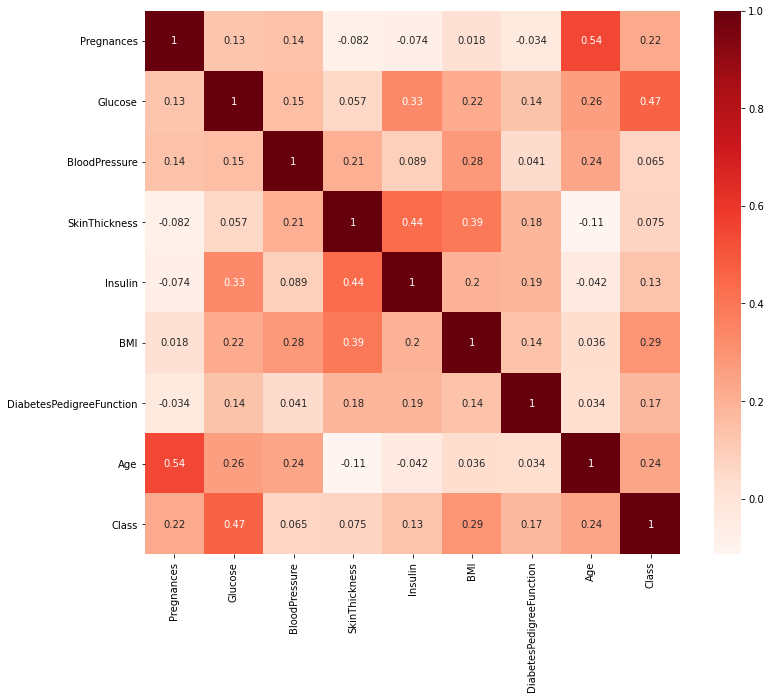

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Lets look at how much the various features are correlated using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

To do machine learning, we must convert the dataframe into a set of feature vectors (usually called 'X') and the class or label which we will call 'y', which in our case is 1-diabetic 0-not diabetic.


In [ ]:
array = data.values
X = array[:,0:8]
y = array[:,8]

#print out the shape of the X feature array--number of features and number of rows/examples
X.shape

(768, 8)

Note it also has 768 rows (note this is rows/cols not x,y). But there is 1 less column. Why is there 1 less and how did that happen?


Now with our data organized, we can try training a classifier. We will start with that to show the impact of feature selection. We will use a support vector machine (SVM) which is a popular traditional machine learning method. We also need to split data into a set used to train the SVM, and a hold-out set to see how well it worked (the 'test' set). 

sklearn is a very comprehence library of machine learning algorithms. (https://scikit-learn.org/stable/)  There are other scikit libraries such as for image manipulation, statistics, engineering, etc. SciPy.org is the host site.


In [ ]:
#Import svm model
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

# define a function that will train a classifier and then measure performance

def train_and_measure_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy: how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_pred))

baseline_performance = train_and_measure_performance(X, y)
print (f'Baseline accruacy with all features is {baseline_performance}')

Baseline accruacy with all features is 0.7402597402597403


Now we will use sklearn feature selection methods. We will start with filter method--Chi Square

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

# Feature extraction--select the 4 best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
feature_names = data.columns[0:8]

for i, feature in enumerate (feature_names):
    print (f'{fit.scores_[i]}, {feature}') 
#print (feature_names)
#print(fit.scores_)



87.43079122224427, Pregnances
895.4803367623492, Glucose
7.70006972896644, BloodPressure
10.28703358882846, SkinThickness
1138.1827439428018, Insulin
77.17341015708607, BMI
4.168845212891903, DiabetesPedigreeFunction
154.1812563953612, Age


So this means that ranked feature importance is: Insulin, Glucose, Age, BMI, Pregnancies, Skin thickness, BP, Pedigree

But you have to look fairly closely to figure out the order. Can the computer do that for us?  There is a python function called 'sorted' which returns a sorted list of the items in the list. 

In [ ]:
sorted_scores = sorted(fit.scores_)
print (sorted_scores)


[4.168845212891903, 7.70006972896644, 10.28703358882846, 77.17341015708607, 87.43079122224427, 154.1812563953612, 895.4803367623492, 1138.1827439428018]


OK--that sorted the list of values, but we need to re-arrange the feature names to match those. In order to do that, we 'zip' the two lists together, then sort, and then print them out.

In [ ]:
zipped_lists = zip(fit.scores_, feature_names)
sorted_pairs = sorted(zipped_lists)
for f, val in sorted_pairs:
    print (f'{f} - {val}')

4.168845212891903 - DiabetesPedigreeFunction
7.70006972896644 - BloodPressure
10.28703358882846 - SkinThickness
77.17341015708607 - BMI
87.43079122224427 - Pregnances
154.1812563953612 - Age
895.4803367623492 - Glucose
1138.1827439428018 - Insulin


That looks pretty good, except maybe we want 'style points'. See if you can figure out how to reverse the order so the most important is on top. And only show the top 5...

In [ ]:
# Make a copy of the data for Chi-squared method...
#First, need to remove the 'class' column since that is the answer
chi_df = data.drop(columns=["Class"])

# delete the columns we don't want
chi_df = chi_df.drop(columns=["BloodPressure","SkinThickness","DiabetesPedigreeFunction"])

d_chi = chi_df.values 
X_1 = d_chi[:,:]

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using Chi-square is {perf}')

# TODO: you try adding or removing features and see the impact on performance

Accuracy with best features using Chi-square is 0.7445887445887446


Next we will apply a wrapper method--Recursive Feature Elimination or RFE

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

estimator = SVR(kernel="linear")
# we will ask for the top 4 features
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
rank=selector.ranking_
print ("Or if you want to see the ranking of those that didn't make the cut...")
print(rank)


[ True False False False False  True  True False]
Or if you want to see the ranking of those that didn't make the cut...
[1 2 4 5 6 1 1 3]


In [ ]:

# drop all columns not '1'
X_1 = data.drop(data.columns[8], axis=1)  # get rid of 'class'
for i in range(7):
    if selector.support_[i] == False:
        X_1 = X_1.drop(X_1.columns[i], axis=1)

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using RFE is {perf}')

Accuracy with best features using RFE is 0.6753246753246753


In [ ]:
# nof - number of features that we have
nof=8
nof_list=np.arange(1,nof)            
high_score=0
from sklearn.linear_model import LinearRegression

score_list =[]
best_nof = 0
for n in range(nof-1):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    print(f"Optimal case: {best_nof} features, scoring {high_score}")
    if(score>high_score):
        high_score = score
        best_nof = nof_list[n]

print(f"Optimal case: {nof} features, scoring {high_score}")

Optimal case: 0 features, scoring 0
Optimal case: 1 features, scoring 0.02809288404839605
Optimal case: 2 features, scoring 0.07273668864458915
Optimal case: 3 features, scoring 0.14942647398600928
Optimal case: 4 features, scoring 0.2983161933716696
Optimal case: 4 features, scoring 0.2983161933716696
Optimal case: 4 features, scoring 0.2983161933716696
Optimal case: 8 features, scoring 0.2983161933716696


Best alpha using built-in LassoCV: 0.020738
Best score using built-in LassoCV: 0.291466
Lasso picked 6 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

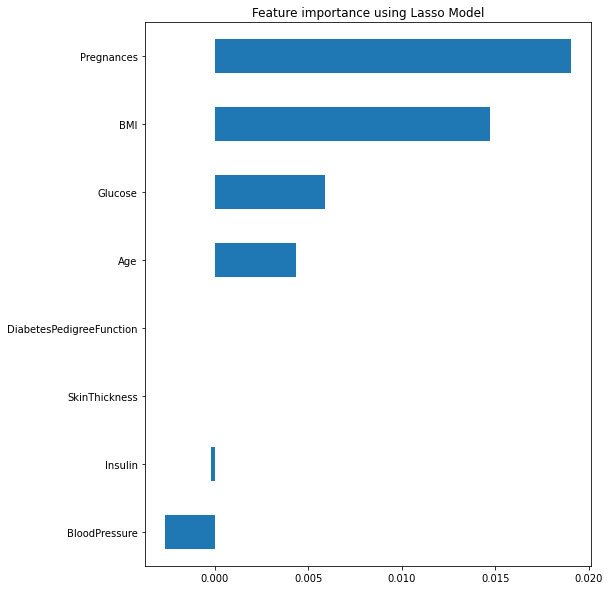

In [ ]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = data.columns[0:8])

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
